## Audio Analysis and silence detection

Todo: Ask Petri what "segments" are in opensmile, it doesn't seem to square when it comes to the numbers.

In [119]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import opensmile

# to play the audio files
from IPython.display import Audio

from constants import metadata_file_mappings

%matplotlib inline

In [120]:
df = pd.read_csv(metadata_file_mappings)
df

,path,filename,participant,statement,confidence_level,confidence_type,accuracy,free_cued_recall
0,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s08.wav',31,8.0,NaN,NaN,1,2
1,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s25.wav',31,25.0,60.0,1.0,1,2
2,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s32.wav',31,32.0,100.0,1.0,1,2
3,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s37.wav',31,37.0,NaN,NaN,0,2
4,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s23.wav',31,23.0,NaN,NaN,0,2
...,...,...,...,...,...,...,...,...
3332,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s31.wav',40,31.0,NaN,NaN,1,2
3333,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s18.wav',40,18.0,NaN,NaN,1,2
3334,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s78.wav',40,78.0,100.0,1.0,1,2
3335,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s24.wav',40,24.0,60.0,1.0,0,2


In [121]:
paths = df["path"].values

df_path = df.loc[df["filename"] == "S2_w01_t1_s69.wav'"]

# path = paths[3322]
path = df_path["path"].values[0]
path

'/home/tim/Downloads/klippta_ljudfiler/w01_t01/S2_w01_t1_s69.wav'

In [122]:
Audio(path)

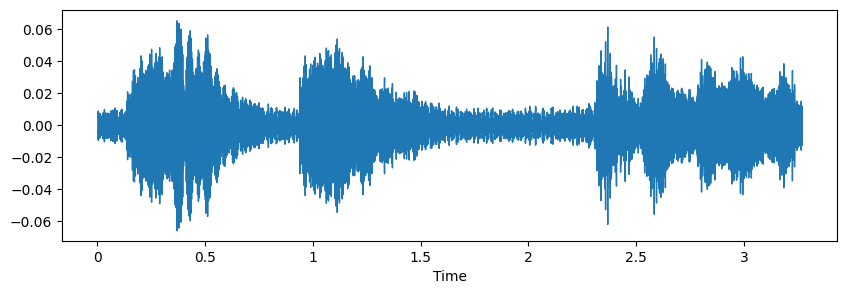

In [123]:
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(data, sr=sampling_rate)

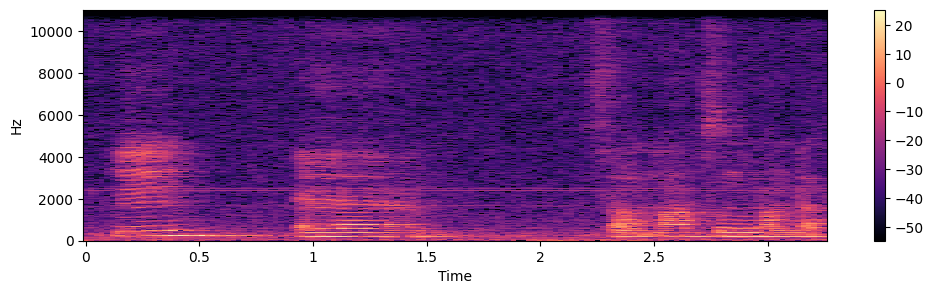

In [124]:
# short fourier transform
# X will be a matrix with:
# - rows corresponding to frequency components
# - columns corresponding to time frames
# Thus, every time frame has a vector of frequency components.
X = librosa.stft(data)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

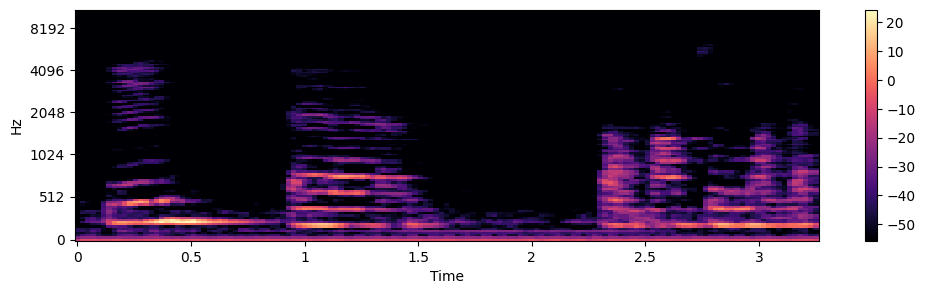

In [125]:
# short fourier transform
X = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

## Extract opensmile data

### Low level descriptors

In [126]:
# set opensmile parameters
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

# process sound file
df_smile_lld = smile.process_file(path)
df_smile_lld

Loudness_sma3  \
file                                               start                  end                                        
/home/tim/Downloads/klippta_ljudfiler/w01_t01/S... 0 days 00:00:00        0 days 00:00:00.020000          0.182292   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000          0.185204   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000          0.186382   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000          0.177652   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000          0.174659   
...                                                                                                            ...   
                                                   0 days 00:00:03.170000 0 days 00:00:03.190000          0.585969   
                                                   0 days 00:00:03.180000 0 days 00:00:03.200000          0.578935   
                                                   0 days 00:00:03.190000 0 days 00:00:03.210000          0.537144   
                                                   0 days 00:00:03.200000 0 days 00:00:03.220000          0.491538   
                                                   0 days 00:00:03.210000 0 days 00:00:03.269206349       0.438316   

                                                                                                     alphaRatio_sma3  \
file                                               start                  end                                          
/home/tim/Downloads/klippta_ljudfiler/w01_t01/S... 0 days 00:00:00        0 days 00:00:00.020000          -19.192644   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000          -19.251524   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000          -18.794426   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000          -19.981291   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000          -19.798384   
...                                                                                                              ...   
                                                   0 days 00:00:03.170000 0 days 00:00:03.190000          -11.878995   
                                                   0 days 00:00:03.180000 0 days 00:00:03.200000          -12.366520   
                                                   0 days 00:00:03.190000 0 days 00:00:03.210000          -14.531948   
                                                   0 days 00:00:03.200000 0 days 00:00:03.220000          -14.965734   
                                                   0 days 00:00:03.210000 0 days 00:00:03.269206349       -15.670856   

                                                                                                     hammarbergIndex_sma3  \
file                                               start                  end                                               
/home/tim/Downloads/klippta_ljudfiler/w01_t01/S... 0 days 00:00:00        0 days 00:00:00.020000                26.352493   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000                25.325811   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000                23.801186   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000                25.356613   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000                25.593651   
...                                                                                                                   ...   
     

In [127]:
# Reset the 'file' part of the MultiIndex
df_smile_lld.reset_index(level='file', drop=True, inplace=True)

# Create a new column 'combined' that calculates the midpoint between 'start' and 'end' intervals
simple_index = [start.total_seconds() for start, end in df_smile_lld.index]

# Set the 'combined' column as the index and drop the original MultiIndex columns
df_smile_lld["simple_index"] = simple_index

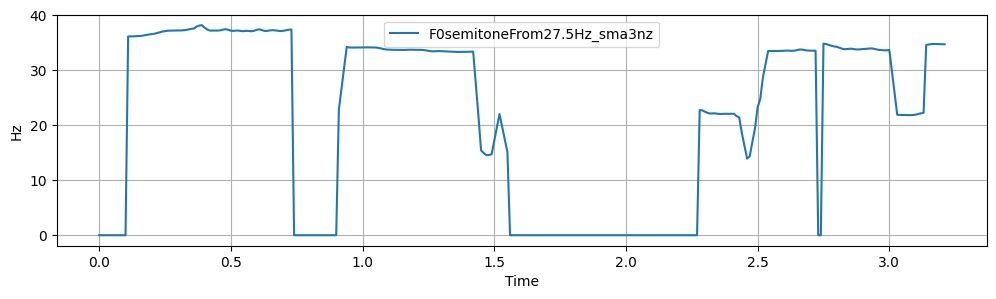

In [128]:
df_smile_lld.plot(x="simple_index", y='F0semitoneFrom27.5Hz_sma3nz', kind='line', figsize=(12, 3))

plt.xlabel('Time')
plt.ylabel('Hz')
plt.grid(True)
plt.show()

### Functionals

In [129]:
# set opensmile parameters
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# process sound file
df_smile_func = smile.process_file(path)
df_smile_func

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/home/tim/Downloads/klippta_ljudfiler/w01_t01/S2_w01_t1_s69.wav,0 days,0 days 00:00:03.269206349,31.571625,0.205675,22.726913,33.691395,37.106033,14.37912,325.298676,216.035172,72.139572,79.890366,...,-0.075662,-0.005994,0.098362,2.461539,1.277955,0.5175,0.115407,0.323333,0.27451,-38.158577


## Silence Detection

In [130]:
total_duration = df_smile_lld.index.get_level_values("end").max().total_seconds()
total_segments = len(df_smile_lld)
print("total duration: ", total_duration)
print("total segments: ", total_segments)

total duration:  3.269206
total segments:  322


There is approximately 10 ms per segment...

Now let's split the lld dataframe into voiced and unvoiced segments

In [131]:
voiced_df = df_smile_lld[df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'] != 0]
unvoiced_df = df_smile_lld[df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'] == 0]
print("The proportion of voiced to unvoiced segments is: ", len(voiced_df) / (len(df_smile_lld)))

The proportion of voiced to unvoiced segments is:  0.6832298136645962


Let's find continuously voiced segments...

In [132]:
cont_voiced_segments = []
n_segments = 0

for F0 in df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'].values:
    # this means unvoiced
    if F0 == 0:
        # check if we have recorded voice in previous segment
        if n_segments > 0:
            # if so save this in the cont_voiced_segments list
            cont_voiced_segments.append(n_segments)
        # and reset
        n_segments = 0
    else:
        # if F0 is not zero, it means there is voice, and therefore we increment the n_segments integer
        n_segments += 1

if n_segments > 0:
    cont_voiced_segments.append(n_segments)

In [133]:
cont_voiced_segments

[63, 65, 45, 47]

In [134]:
print("Number of voiced segments divided by total duration: ",  len(cont_voiced_segments) / (total_segments * 0.01))

Number of voiced segments divided by total duration:  1.2422360248447204


In [135]:
print("VoicedSegmentsPerSec: ", df_smile_func["VoicedSegmentsPerSec"].values[0])

VoicedSegmentsPerSec:  1.2779553


In [136]:
print("Mean length of continuously voiced segments: ", np.asarray(cont_voiced_segments).mean())

Mean length of continuously voiced segments:  55.0


In [137]:
print("MeanVoicedSegmentLengthSec: ", df_smile_func["MeanVoicedSegmentLengthSec"].values[0])

MeanVoicedSegmentLengthSec:  0.5175


Let's look at continuously unvoiced segments

In [138]:
cont_unvoiced_segments = []
n_segments = 0
for F0 in df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'].values:
    # means there is voice
    if F0 != 0:
        if n_segments > 0:
            cont_unvoiced_segments.append(n_segments)
        n_segments = 0
    else:
        # no voice, increment n_segments
        n_segments += 1    
if n_segments > 0:
    cont_unvoiced_segments.append(n_segments)

In [139]:
cont_unvoiced_segments

[11, 17, 72, 2]

In [140]:
print("mean length of continuously unvoiced segments: ", np.asarray(cont_unvoiced_segments).mean())

mean length of continuously unvoiced segments:  25.5


In [141]:
print("MeanUnvoicedSegmentLength: ", df_smile_func["MeanUnvoicedSegmentLength"].values[0])

MeanUnvoicedSegmentLength:  0.32333332
